# Exploratory Data Analysis (EDA)

---------

## Introdiction

Every day millions of residents and visitors of NEW YORK city flood the subway system as their primary means of transportation throughout the city. And every station for the subway system named the MTA, is a high traffic area, which is optimal for interfacing with a large number of people. Therefore, the presence of a souvenir’s shops inside these stations, facilitates and helps residents and visitors to buy while they are inside the station.

### Data Description

- **C/A:** Control Area (A002)
- **UNIT:** Remote Unit for a station (R051)
- **SCP:** Subunit Channel Position represents an specific address for a device (02-00-00)
- **STATION:** Represents the station name the device is located at
- **LINENAME:** Represents all train lines that can be boarded at this station
- **DIVISION:** Represents the Line originally the station belonged to BMT, IRT, or IND
- **DATE:** Represents the date (MM-DD-YY)
- **TIME:** Represents the time (hh:mm:ss) for a scheduled audit event
- **DESC:** Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
- **ENTRIES:** The comulative entry register value for a device
- **EXITS:** The cumulative exit register value for a device

# Importing libraries and packages

In [1]:
import datetime 
import pandas            as pd
import numpy             as np
import seaborn           as sns
import matplotlib.pyplot as plt
from sqlalchemy          import create_engine
%matplotlib inline

# Data Gathering

- **reading the data for the date from june 2019 to september 2019**

In [2]:
# Source: http://web.mta.info/developers/turnstile.html
# Reading Multiple txt Files and Creating Data Frame

def get_data(week_num,reset_index=True):
    url='http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt'
    defs=[]
    for week in week_num:
        file_url=url.format(week)
        #print(file_url)
        defs.append(pd.read_csv(file_url))
    return pd.concat(defs)
week_num=[190601,190608,190615,190622,190629,190706,190713,190720,190727,190803,190810,
          190817,190824,190831,190907,190914,190921,190928]
data_df=get_data(week_num)

In [3]:
#Checking DataFrame's first 10 rows

data_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,00:00:00,REGULAR,7071830,2396411
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,04:00:00,REGULAR,7071844,2396415
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,08:00:00,REGULAR,7071864,2396443
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,12:00:00,REGULAR,7071943,2396500
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,16:00:00,REGULAR,7072182,2396555
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/25/2019,20:00:00,REGULAR,7072456,2396593
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,00:00:00,REGULAR,7072639,2396608
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,04:00:00,REGULAR,7072662,2396613
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,08:00:00,REGULAR,7072673,2396619
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,05/26/2019,12:00:00,REGULAR,7072746,2396665


### **use SQL to load dataset**

In [4]:
engine=create_engine('sqlite://', echo=False)

In [5]:
# run this to add the data to a table in the database
data_df.to_sql("mtaps",con=engine)

In [6]:
df=pd.read_sql('SELECT * FROM mtaps ORDER BY STATION ;',engine)

In [7]:
#Checking DataFrame's first 10 rows
df.head(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,31130,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,00:00:00,REGULAR,14719444,16451172
1,31131,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,04:00:00,REGULAR,14719444,16451172
2,31132,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,08:00:00,REGULAR,14719444,16451172
3,31133,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,12:00:00,REGULAR,14719444,16451173
4,31134,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,16:00:00,REGULAR,14719444,16451173
5,31135,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,20:00:00,REGULAR,14719444,16451173
6,31136,H007,R248,00-00-00,1 AV,L,BMT,05/26/2019,00:00:00,REGULAR,14719444,16451173
7,31137,H007,R248,00-00-00,1 AV,L,BMT,05/26/2019,04:00:00,REGULAR,14719444,16451173
8,31138,H007,R248,00-00-00,1 AV,L,BMT,05/26/2019,08:00:00,REGULAR,14719444,16451173
9,31139,H007,R248,00-00-00,1 AV,L,BMT,05/26/2019,12:00:00,REGULAR,14719444,16451173


In [8]:
#Checking DataFrame's last 10 rows
df.tail(10)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
3714054,180624,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/26/2019,09:00:00,REGULAR,39,159
3714055,180625,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/26/2019,13:00:00,REGULAR,39,159
3714056,180626,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/26/2019,17:00:00,REGULAR,39,159
3714057,180627,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/26/2019,21:00:00,REGULAR,39,159
3714058,180628,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/27/2019,01:00:00,REGULAR,39,159
3714059,180629,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/27/2019,05:00:00,REGULAR,39,159
3714060,180630,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/27/2019,09:00:00,REGULAR,39,159
3714061,180631,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/27/2019,13:00:00,REGULAR,39,159
3714062,180632,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/27/2019,17:00:00,REGULAR,39,159
3714063,180633,R419,R326,00-05-01,ZEREGA AV,6,IRT,09/27/2019,21:00:00,REGULAR,39,159


# 

# Data cleaning

In [9]:
#Checking DataFrame size
#shape before filtring
df.shape

(3714064, 12)

In [10]:
# print a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3714064 entries, 0 to 3714063
Data columns (total 12 columns):
 #   Column                                                                Dtype 
---  ------                                                                ----- 
 0   index                                                                 int64 
 1   C/A                                                                   object
 2   UNIT                                                                  object
 3   SCP                                                                   object
 4   STATION                                                               object
 5   LINENAME                                                              object
 6   DIVISION                                                              object
 7   DATE                                                                  object
 8   TIME                                                          

In [11]:
len(df['STATION'].value_counts()) 

378

In [12]:
# display the columns names
df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [13]:
# Eliminate spaces at columns names
# striping
df.columns=[column.strip() for column in df.columns]
df.columns

Index(['index', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [14]:
#Checking null values based on columns
df.isnull().sum()

index       0
C/A         0
UNIT        0
SCP         0
STATION     0
LINENAME    0
DIVISION    0
DATE        0
TIME        0
DESC        0
ENTRIES     0
EXITS       0
dtype: int64

In [15]:
df.isnull()

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
3714059,False,False,False,False,False,False,False,False,False,False,False,False
3714060,False,False,False,False,False,False,False,False,False,False,False,False
3714061,False,False,False,False,False,False,False,False,False,False,False,False
3714062,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.DESC.value_counts()

REGULAR       3698611
RECOVR AUD      15453
Name: DESC, dtype: int64

- **merge date and time**

In [17]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME)
df.head(1)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME
0,31130,H007,R248,00-00-00,1 AV,L,BMT,05/25/2019,00:00:00,REGULAR,14719444,16451172,2019-05-25


- **create new column WEEK_DAY**

In [18]:
df['DATE'] = pd.to_datetime(df['DATE'], cache=True)
df['WEEK_DAY'] = df['DATE'].dt.day_name()
df.head(2)

,index,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,WEEK_DAY
0,31130,H007,R248,00-00-00,1 AV,L,BMT,2019-05-25,00:00:00,REGULAR,14719444,16451172,2019-05-25 00:00:00,Saturday
1,31131,H007,R248,00-00-00,1 AV,L,BMT,2019-05-25,04:00:00,REGULAR,14719444,16451172,2019-05-25 04:00:00,Saturday


### Entries and Exits process

- **check befor duplicates entries**

In [19]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
2977859,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2
2632964,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
93757,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 01:00:00,2
93758,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 05:00:00,2
93759,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 09:00:00,2


- **check befor duplicates exits**

In [20]:
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
2977859,R249,R179,01-05-00,86 ST,2019-06-27 00:00:00,2
2632964,R174,R034,00-00-02,125 ST,2019-06-08 00:00:00,2
93757,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 01:00:00,2
93758,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 05:00:00,2
93759,A034,R170,03-05-03,14 ST-UNION SQ,2019-08-12 09:00:00,2


- **drop duplicates**

In [21]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [22]:
# check after duplicates entries
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-05-25 00:00:00,1
2476023,R138,R293,00-03-04,34 ST-PENN STA,2019-07-25 22:00:00,1
2475997,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 14:00:00,1
2475998,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 18:00:00,1
2475999,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 22:00:00,1


In [23]:
## check after duplicates exits
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .EXITS.count()
 .reset_index()
 .sort_values("EXITS", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,EXITS
0,A002,R051,02-00-00,59 ST,2019-05-25 00:00:00,1
2476023,R138,R293,00-03-04,34 ST-PENN STA,2019-07-25 22:00:00,1
2475997,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 14:00:00,1
2475998,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 18:00:00,1
2475999,R138,R293,00-03-04,34 ST-PENN STA,2019-07-21 22:00:00,1


In [24]:
print("Total number of duplicate rows: ", df.duplicated().sum())


Total number of duplicate rows:  0


In [25]:
# remove the other month
mask=((df["DATE"]=="05/25/2019")|(df["DATE"]=="05/26/2019")|
      (df["DATE"]=="05/27/2019")|(df["DATE"]=="05/28/2019")|
      (df["DATE"]=="05/29/2019")|(df["DATE"]=="05/30/2019")|
      (df["DATE"]=="05/31/2019"))
df2=df[~mask]

In [26]:
df2.DATE.value_counts().sort_index()

2019-06-01    29063
2019-06-02    28964
2019-06-03    30022
2019-06-04    29513
2019-06-05    29484
              ...  
2019-09-23    29121
2019-09-24    29342
2019-09-25    29437
2019-09-26    29510
2019-09-27    29425
Name: DATE, Length: 119, dtype: int64

In [27]:
print("Number of unique values in Date: ",df2['DATE'].nunique())

Number of unique values in Date:  119


In [28]:
print("Number of unique values in STATION: ",df2['STATION'].nunique())

Number of unique values in STATION:  378


### daily entries

In [29]:
df_daily_entries = (df2.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [30]:
df_daily_entries.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-01,7080817
1,A002,R051,02-00-00,59 ST,2019-06-02,7081567
2,A002,R051,02-00-00,59 ST,2019-06-03,7082949
3,A002,R051,02-00-00,59 ST,2019-06-04,7084565
4,A002,R051,02-00-00,59 ST,2019-06-05,7086109


In [31]:
df_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily_entries
        .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
        .apply(lambda grp: grp.shift(1)))

<ipython-input-31-c9e840dcb11f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily_entries[["PREV_DATE", "PREV_ENTRIES"]] = (df_daily_entries


In [32]:
df_daily_entries.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2019-06-01,7080817,NaT,NaN
1,A002,R051,02-00-00,59 ST,2019-06-02,7081567,2019-06-01,7080817.0
2,A002,R051,02-00-00,59 ST,2019-06-03,7082949,2019-06-02,7081567.0
3,A002,R051,02-00-00,59 ST,2019-06-04,7084565,2019-06-03,7082949.0
4,A002,R051,02-00-00,59 ST,2019-06-05,7086109,2019-06-04,7084565.0


In [33]:
df_daily_entries.tail(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
580458,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-23,5554,2019-09-22,5554.0
580459,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-24,5554,2019-09-23,5554.0
580460,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-25,5554,2019-09-24,5554.0
580461,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-26,5554,2019-09-25,5554.0
580462,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-27,5554,2019-09-26,5554.0


In [34]:
df_daily_entries.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [35]:
df_daily_entries[df_daily_entries["ENTRIES"] < df_daily_entries["PREV_ENTRIES"]].head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1351,A002,R051,02-06-00,59 ST,2019-07-13,524,2019-07-12,258249.0
2560,A007,R079,01-05-01,5 AV/59 ST,2019-08-05,0,2019-08-04,1.0
4612,A011,R080,01-03-00,57 ST-7 AV,2019-08-20,885829427,2019-08-19,885829659.0
4613,A011,R080,01-03-00,57 ST-7 AV,2019-08-21,885828919,2019-08-20,885829427.0
4614,A011,R080,01-03-00,57 ST-7 AV,2019-08-22,885828367,2019-08-21,885828919.0


In [36]:
(df_daily_entries[df_daily_entries["ENTRIES"] < df_daily_entries["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A002   R051  02-06-00  59 ST                1
A007   R079  01-05-01  5 AV/59 ST           1
A011   R080  01-03-00  57 ST-7 AV          39
A015   R081  00-03-01  49 ST                1
A025   R023  01-03-01  34 ST-HERALD SQ    118
                                         ... 
R629   R065  00-00-01  ROCKAWAY AV          1
R645   R110  00-03-02  FLATBUSH AV-B.C      2
R646   R110  01-00-01  FLATBUSH AV-B.C    118
R730   R431  00-00-04  EASTCHSTER/DYRE    115
TRAM1  R468  00-00-01  RIT-MANHATTAN        1
Length: 552, dtype: int64

In [37]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
df_daily_entries["DAILY_ENTRIES"] = df_daily_entries.apply(get_daily_counts, axis=1, max_counter=1000000)

12 6170034.0
617 3124306.0
724 3557590.0
458818 12875905.0
1376283 8703.0
459027 68448066.0
371 4317056.0
111 1599317.0
2000091967 6897017.0
460501 6804909.0
703 2029641260.0
1790 13967417.0
73 6697765.0
14 2997591.0
5327469 4320256.0
4320262 2920966.0
221 7246254.0
4050694 5902992.0
7246468 4050451.0
524600 5853002.0
875479599 775219651.0
592067 57022593.0
590597 9156558.0
88 2728627.0
94 4283110.0
276 5420884.0
98 1478936.0
721000 5343048.0
126 6053205.0
190 3407197.0
1561 1653403.0
241 17135546.0
5571815 104607574.0
459063 4526857.0
22 2129136913.0
21 13593868.0
27 7808626.0
21 2129136817.0
28 13594033.0
21 7809012.0
458752 117849318.0
24 2781046.0
1658 4588920.0
1962917548 9137598.0
228 1393341.0
286 3466273.0
393224 117441229.0
23 2130520.0
721441460 2880424.0
1828703861 9687851.0
126 4086499.0
352361625 1409587.0
1834 2588198.0
14 4584512.0
77 3260283.0
251 3376441.0
279 3839324.0
1201 4720992.0
1337 4676887.0
607 621485338.0
983783 3670905.0
164 1788069.0
1325342697 11664580.0
1

In [38]:
df_daily_entries.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES
1,A002,R051,02-00-00,59 ST,2019-06-02,7081567,2019-06-01,7080817.0,750.0
2,A002,R051,02-00-00,59 ST,2019-06-03,7082949,2019-06-02,7081567.0,1382.0
3,A002,R051,02-00-00,59 ST,2019-06-04,7084565,2019-06-03,7082949.0,1616.0
4,A002,R051,02-00-00,59 ST,2019-06-05,7086109,2019-06-04,7084565.0,1544.0
5,A002,R051,02-00-00,59 ST,2019-06-06,7087657,2019-06-05,7086109.0,1548.0


### daily exits

In [39]:
df_daily_exits = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .EXITS.first())

In [40]:
df_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (df_daily_exits
        .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "EXITS"]
        .apply(lambda grp: grp.shift(1)))

<ipython-input-40-fb28bd57c232>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_daily_exits[["PREV_DATE", "PREV_EXITS"]] = (df_daily_exits


In [41]:
df_daily_exits.head(5)

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
0,A002,R051,02-00-00,59 ST,2019-05-25,2396593,NaT,NaN
1,A002,R051,02-00-00,59 ST,2019-05-26,2396741,2019-05-25,2396593.0
2,A002,R051,02-00-00,59 ST,2019-05-27,2396919,2019-05-26,2396741.0
3,A002,R051,02-00-00,59 ST,2019-05-28,2397410,2019-05-27,2396919.0
4,A002,R051,02-00-00,59 ST,2019-05-29,2397944,2019-05-28,2397410.0


In [42]:
df_daily_exits.tail(5)

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
614447,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-23,420,2019-09-22,420.0
614448,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-24,420,2019-09-23,420.0
614449,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-25,420,2019-09-24,420.0
614450,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-26,420,2019-09-25,420.0
614451,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2019-09-27,420,2019-09-26,420.0


In [43]:
df_daily_exits.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [44]:
df_daily_exits[df_daily_exits["EXITS"] < df_daily_exits["PREV_EXITS"]].head(5)

,C/A,UNIT,SCP,STATION,DATE,EXITS,PREV_DATE,PREV_EXITS
1435,A002,R051,02-06-00,59 ST,2019-07-13,33,2019-07-12,8212.0
2714,A007,R079,01-05-01,5 AV/59 ST,2019-08-05,2,2019-08-04,1299.0
4881,A011,R080,01-03-00,57 ST-7 AV,2019-08-16,490361267,2019-08-15,490361274.0
4883,A011,R080,01-03-00,57 ST-7 AV,2019-08-18,490361261,2019-08-17,490361267.0
4884,A011,R080,01-03-00,57 ST-7 AV,2019-08-19,490361245,2019-08-18,490361261.0


In [45]:
def get_daily_counts(row, max_counter):
    counter = row["EXITS"] - row["PREV_EXITS"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["EXITS"], row["PREV_EXITS"])
        counter = min(row["EXITS"], row["PREV_EXITS"])
    if counter > max_counter:
        return 0
    return counter
df_daily_exits["DAILY_EXITS"] = df_daily_exits.apply(get_daily_counts, axis=1, max_counter=1000000)

8 20876636.0
1236 1109172.0
151 1662547.0
505 1832997.0
23 2255978.0
133 16906870.0
0 1045672.0
51 1109380.0
1850344989 8702864.0
125 1010071.0
483 702628996.0
959 14611990.0
111 3570079.0
3 4745860.0
3430101 8440581.0
4745869 2455688.0
8440593 1962487.0
613 6668706.0
1778819 4759753.0
6668727 1778803.0
37 5978882.0
996500252 1698414882.0
701 19884031.0
59 3688115.0
103 3542591.0
187 2582667.0
180 10787288.0
200 1298749.0
146 6368692.0
236 4923300.0
291 2578927.0
88 10179468.0
1498 4576093.0
161 3130098.0
16 1155490178.0
14 15837645.0
15 4262196.0
17 1155489758.0
12 15838154.0
14 4262925.0
6 1398475.0
809 3352549.0
318790192 1305662.0
925 9433893.0
1895801462 9395822.0
1828766425 7175415.0
117 1789808.0
604040331 2397768.0
1400 1988548.0
1 1161891.0
1391 12613231.0
806 10021087.0
420 5003411.0
2036 7279418.0
205 369533217.0
150 1692587.0
687875231 2749128.0
293 1412394.0
1421 1168330.0
334 1349384.0
1422 1910368.0
1071 2845773.0
0 1101959.0
1711 2612408.0
1430 2011812.0
1278 1879018.0


## merge daily entries and daily exits

In [46]:
df_daily_entries_exits=[df_daily_entries,df_daily_exits]
daily_entries_exits=pd.merge(df_daily_entries,df_daily_exits)
daily_entries_exits.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2019-06-02,7081567,2019-06-01,7080817.0,750.0,2399319,2399121.0,198.0
1,A002,R051,02-00-00,59 ST,2019-06-03,7082949,2019-06-02,7081567.0,1382.0,2399714,2399319.0,395.0
2,A002,R051,02-00-00,59 ST,2019-06-04,7084565,2019-06-03,7082949.0,1616.0,2400149,2399714.0,435.0
3,A002,R051,02-00-00,59 ST,2019-06-05,7086109,2019-06-04,7084565.0,1544.0,2400691,2400149.0,542.0
4,A002,R051,02-00-00,59 ST,2019-06-06,7087657,2019-06-05,7086109.0,1548.0,2401210,2400691.0,519.0


In [47]:
daily_entries_exits.dropna(subset=["PREV_ENTRIES","PREV_EXITS"], axis=0, inplace=True)
daily_entries_exits.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2019-06-02,7081567,2019-06-01,7080817.0,750.0,2399319,2399121.0,198.0
1,A002,R051,02-00-00,59 ST,2019-06-03,7082949,2019-06-02,7081567.0,1382.0,2399714,2399319.0,395.0
2,A002,R051,02-00-00,59 ST,2019-06-04,7084565,2019-06-03,7082949.0,1616.0,2400149,2399714.0,435.0
3,A002,R051,02-00-00,59 ST,2019-06-05,7086109,2019-06-04,7084565.0,1544.0,2400691,2400149.0,542.0
4,A002,R051,02-00-00,59 ST,2019-06-06,7087657,2019-06-05,7086109.0,1548.0,2401210,2400691.0,519.0


In [48]:
daily_entries_exits.shape

(575507, 12)

## Outliers:

### for entries

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


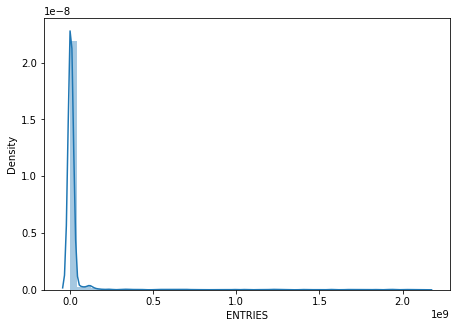

In [49]:
#let us see the distribution:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(daily_entries_exits["ENTRIES"])
plt.show()

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ENTRIES'>

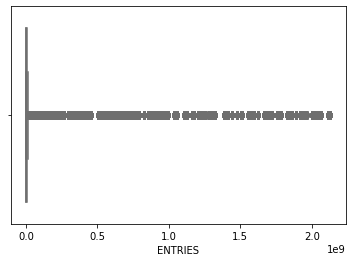

In [50]:
sns.boxplot(daily_entries_exits["ENTRIES"],color='skyblue')


In [51]:
percentile25 = daily_entries_exits["ENTRIES"].quantile(0.25)
percentile75 = daily_entries_exits["ENTRIES"].quantile(0.75)

In [52]:
IQR=percentile75 - percentile25
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [53]:
new_daily_entries_exits= daily_entries_exits[daily_entries_exits["ENTRIES"] < upper_limit]
new_daily_entries_exits.shape

(520030, 12)

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes

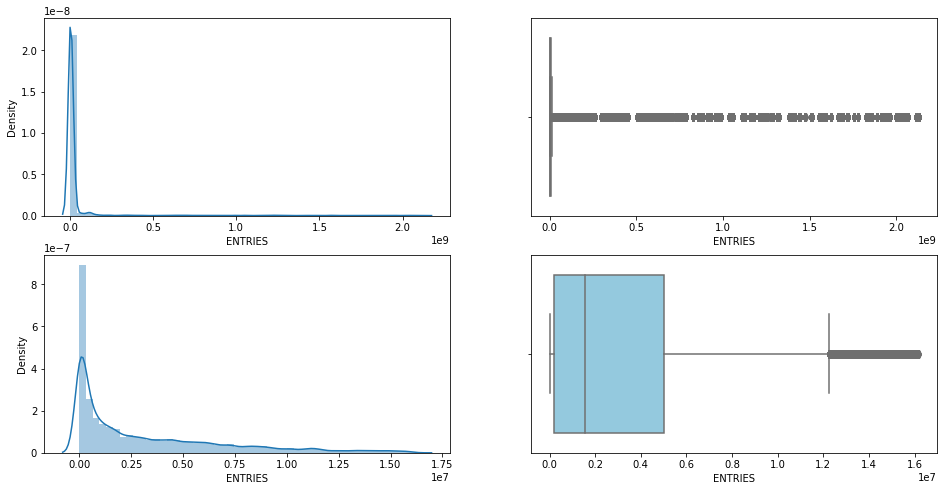

In [54]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(daily_entries_exits["ENTRIES"])
plt.subplot(2,2,2)
sns.boxplot(daily_entries_exits["ENTRIES"],color='skyblue')
plt.subplot(2,2,3)
sns.distplot(new_daily_entries_exits["ENTRIES"])
plt.subplot(2,2,4)
sns.boxplot(new_daily_entries_exits["ENTRIES"],color='skyblue')
plt.show()

### for exits

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


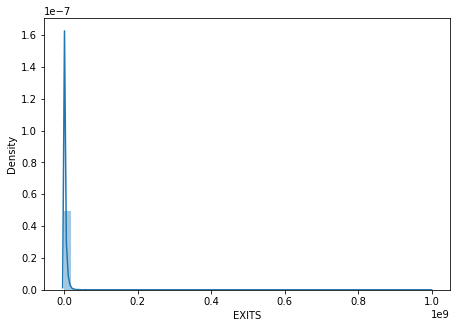

In [55]:
#let us see the distribution:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(new_daily_entries_exits["EXITS"])
plt.show()

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EXITS'>

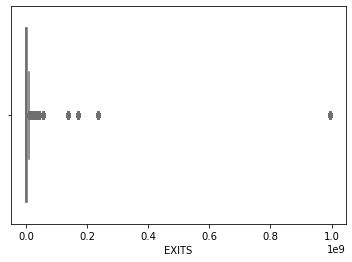

In [56]:
sns.boxplot(new_daily_entries_exits["EXITS"],color='skyblue')

In [57]:
percentile25 = new_daily_entries_exits["EXITS"].quantile(0.25)
percentile75 = new_daily_entries_exits["EXITS"].quantile(0.75)

In [58]:
upper_limit = percentile75 + 1.5 * IQR
lower_limit = percentile25 - 1.5 * IQR

In [59]:
new_daily_entries_exits1 = new_daily_entries_exits[new_daily_entries_exits["EXITS"] < upper_limit]
new_daily_entries_exits1.shape

(503739, 12)

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes

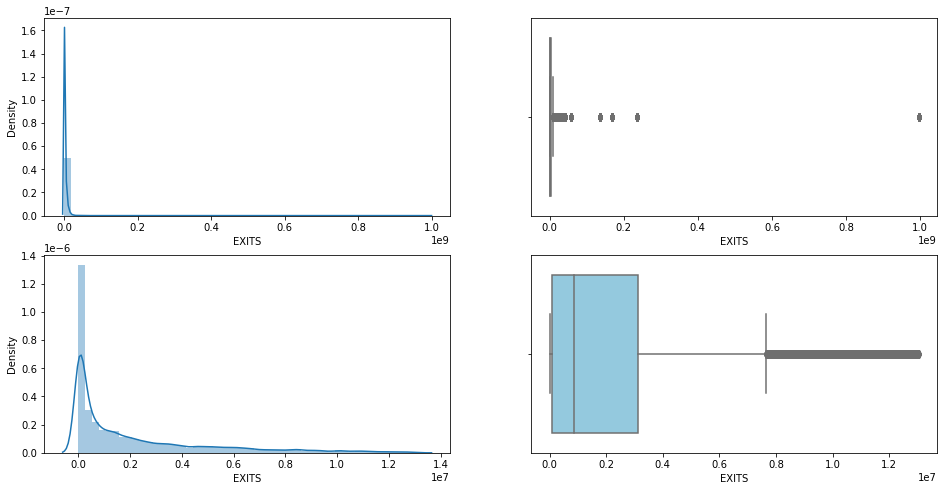

In [60]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(new_daily_entries_exits["EXITS"])
plt.subplot(2,2,2)
sns.boxplot(new_daily_entries_exits["EXITS"],color='skyblue')
plt.subplot(2,2,3)
sns.distplot(new_daily_entries_exits1["EXITS"])
plt.subplot(2,2,4)
sns.boxplot(new_daily_entries_exits1["EXITS"],color='skyblue')
plt.show()

In [61]:
new_daily_entries_exits1.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
0,A002,R051,02-00-00,59 ST,2019-06-02,7081567,2019-06-01,7080817.0,750.0,2399319,2399121.0,198.0
1,A002,R051,02-00-00,59 ST,2019-06-03,7082949,2019-06-02,7081567.0,1382.0,2399714,2399319.0,395.0
2,A002,R051,02-00-00,59 ST,2019-06-04,7084565,2019-06-03,7082949.0,1616.0,2400149,2399714.0,435.0
3,A002,R051,02-00-00,59 ST,2019-06-05,7086109,2019-06-04,7084565.0,1544.0,2400691,2400149.0,542.0
4,A002,R051,02-00-00,59 ST,2019-06-06,7087657,2019-06-05,7086109.0,1548.0,2401210,2400691.0,519.0


In [62]:
station_daily = new_daily_entries_exits1.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_daily.head(5)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,A002,R051,59 ST,2019-06-02,6581.0,3593.0
1,A002,R051,59 ST,2019-06-03,12377.0,7028.0
2,A002,R051,59 ST,2019-06-04,13472.0,8223.0
3,A002,R051,59 ST,2019-06-05,13541.0,8572.0
4,A002,R051,59 ST,2019-06-06,13702.0,8356.0


In [63]:
station_daily1 = new_daily_entries_exits1.groupby(["STATION", "DATE"])[['DAILY_ENTRIES','DAILY_EXITS']].sum().reset_index()
station_daily1.head(5)

,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
0,1 AV,2019-06-02,3757.0,4107.0
1,1 AV,2019-06-03,6672.0,7550.0
2,1 AV,2019-06-04,6590.0,7381.0
3,1 AV,2019-06-05,7447.0,8574.0
4,1 AV,2019-06-06,6984.0,7831.0


In [64]:
station_totals = station_daily1.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head(5)

,STATION,DAILY_ENTRIES,DAILY_EXITS
0,GRD CNTRL-42 ST,15343411.0,14010146.0
1,34 ST-PENN STA,14647880.0,13255773.0
2,23 ST,10905773.0,7138292.0
3,FULTON ST,9662400.0,7714918.0
4,34 ST-HERALD SQ,9189708.0,7367138.0


### Top five stations by total Entries and Exits

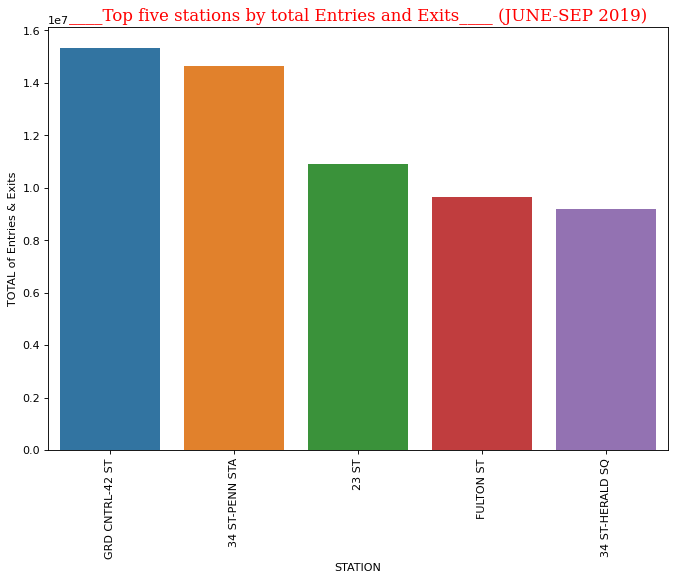

In [65]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10,7), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x=station_totals['STATION'][:5], y = station_totals['DAILY_ENTRIES'][:5] ,
            data = station_totals)

plt.xticks(rotation=90)
plt.ylabel('TOTAL of Entries & Exits')
plt.xlabel('STATION')

plt.title('____Top five stations by total Entries and Exits____ (JUNE-SEP 2019)',family='serif',fontsize =15,color='r')
plt.show()

# Observation

This is the final bar chart that shows us which station has the maximum traffic. We could notice that both stations that are located in Midtown Manhattan (GRO CNTRL-42 ST , 34 ST-PENN STA) in blue and orange colors have an approximated equal maximum Daily entry which means highest traffic among other stations, so both are the best stations to place our business stand in order to increase our revinues. On the other hand, stations ( 34 ST-HEARALD SQ, 23 ST) in green and red colors which are located in Hearald SQ and Flatiron District of Manhattan have the second place in traffic volumes ammounts.Finally, Pathe New WTC station that is located in Financial District of Manhattan has the third place in daily traffic.

## let us Analyze the top station that has the highest daily entries:

In [66]:
new_daily_entries_exits1[new_daily_entries_exits1.STATION=='GRD CNTRL-42 ST']

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
442792,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-06-02,2011659,2019-06-01,2011292.0,367.0,5486917,5485992.0,925.0
442793,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-06-03,2013705,2019-06-02,2011659.0,2046.0,5491675,5486917.0,4758.0
442794,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-06-04,2015894,2019-06-03,2013705.0,2189.0,5496695,5491675.0,5020.0
442795,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-06-05,2018203,2019-06-04,2015894.0,2309.0,5501737,5496695.0,5042.0
442796,R236,R045,00-00-00,GRD CNTRL-42 ST,2019-06-06,2020377,2019-06-05,2018203.0,2174.0,5506956,5501737.0,5219.0
...,...,...,...,...,...,...,...,...,...,...,...,...
450649,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-09-23,739390,2019-09-22,737592.0,1798.0,27399,27341.0,58.0
450650,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-09-24,740974,2019-09-23,739390.0,1584.0,27470,27399.0,71.0
450651,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-09-25,742492,2019-09-24,740974.0,1518.0,27524,27470.0,54.0
450652,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-09-26,744129,2019-09-25,742492.0,1637.0,27587,27524.0,63.0


In [67]:
top_station_1 = new_daily_entries_exits1[(new_daily_entries_exits1["C/A"] == "R241A") & 
(new_daily_entries_exits1["UNIT"] == "R048") & 
(new_daily_entries_exits1["SCP"] == "00-00-04") & 
(new_daily_entries_exits1["STATION"] == "GRD CNTRL-42 ST")]
top_station_1.head(5)

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
450536,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-06-02,639349,2019-06-01,639283.0,66.0,23410,23409.0,1.0
450537,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-06-03,640603,2019-06-02,639349.0,1254.0,23444,23410.0,34.0
450538,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-06-04,641804,2019-06-03,640603.0,1201.0,23483,23444.0,39.0
450539,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-06-05,642933,2019-06-04,641804.0,1129.0,23507,23483.0,24.0
450540,R241A,R048,00-00-04,GRD CNTRL-42 ST,2019-06-06,644247,2019-06-05,642933.0,1314.0,23539,23507.0,32.0


Text(0.5, 1.0, 'Daily Entries for Turnstile (GRD CNTRL-42 ST) Station')

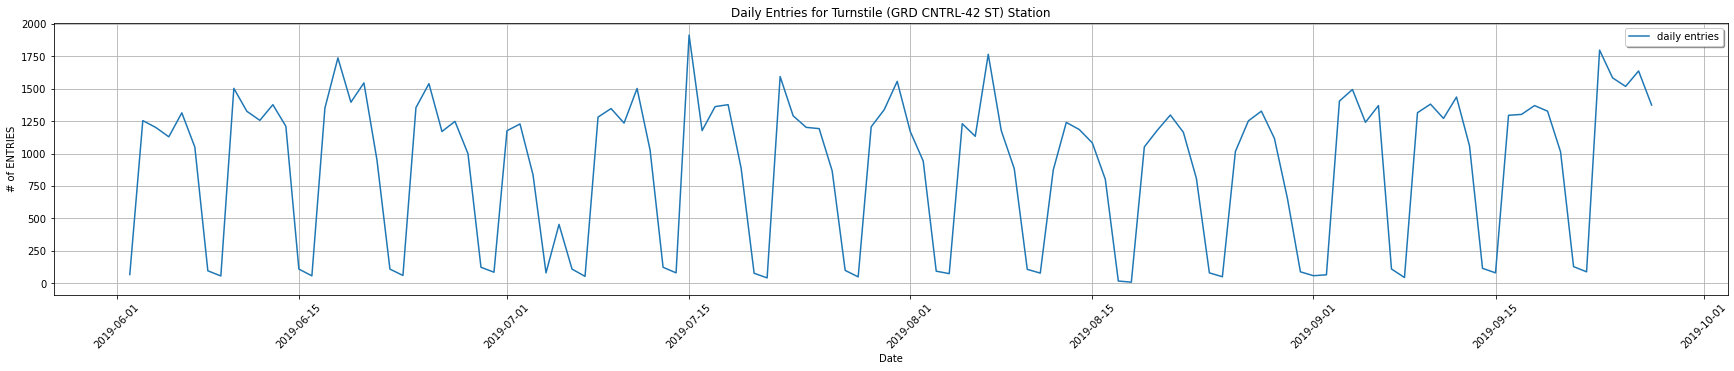

In [68]:
plt.figure(figsize=(30,5))
plt.plot(top_station_1['DATE'], top_station_1['DAILY_ENTRIES'])
plt.ylabel('# of ENTRIES')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['daily entries'],shadow = True, loc = 0)
plt.title('Daily Entries for Turnstile (GRD CNTRL-42 ST) Station')

Text(0.5, 1.0, 'Daily Exits for Turnstile (GRD CNTRL-42 ST) Station')

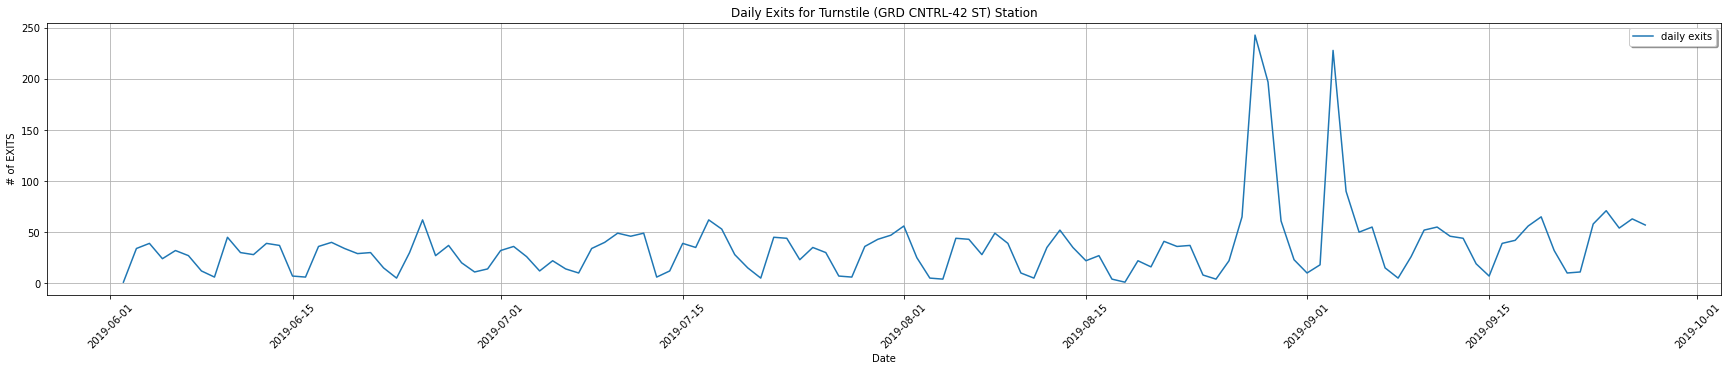

In [69]:
plt.figure(figsize=(30,5))
plt.plot(top_station_1['DATE'], top_station_1['DAILY_EXITS'])
plt.ylabel('# of EXITS')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.legend(['daily exits'],shadow = True, loc = 0)
plt.title('Daily Exits for Turnstile (GRD CNTRL-42 ST) Station')

(array([35.,  0.,  1.,  1.,  9., 11., 34., 17.,  6.,  4.]),
 array([   7. ,  197.7,  388.4,  579.1,  769.8,  960.5, 1151.2, 1341.9,
        1532.6, 1723.3, 1914. ]),
 <BarContainer object of 10 artists>)

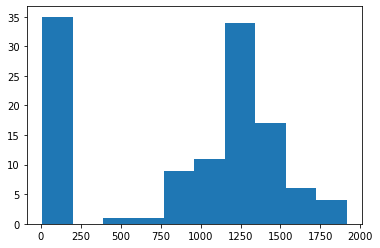

In [70]:
#PLOT HIST FOR THE TOP STATION DATA WITH SEPECIFIC VALUES:
plt.hist(top_station_1['DAILY_ENTRIES'])

(array([44., 52., 18.,  1.,  0.,  0.,  0.,  0.,  1.,  2.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <BarContainer object of 10 artists>)

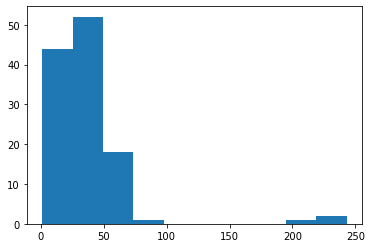

In [71]:
 plt.hist(top_station_1['DAILY_EXITS'])

In [72]:
#NOW LET US TAKE VISUALIZE ALL TOP STATION (GRD CNTRL-42 ST ) VALUES
station_daily_GRD_CNTRL_42_ST = station_daily[station_daily['STATION'] == 'GRD CNTRL-42 ST']
station_daily_GRD_CNTRL_42_ST.head(5)

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS
66866,R236,R045,GRD CNTRL-42 ST,2019-06-02,4319.0,6136.0
66867,R236,R045,GRD CNTRL-42 ST,2019-06-03,22810.0,21459.0
66868,R236,R045,GRD CNTRL-42 ST,2019-06-04,23517.0,21558.0
66869,R236,R045,GRD CNTRL-42 ST,2019-06-05,24730.0,22556.0
66870,R236,R045,GRD CNTRL-42 ST,2019-06-06,24457.0,22669.0


(array([817.,   3.,   1.,   0.,   2.,   2.,   0.,   0.,   0.,   1.]),
 array([     0. ,  85762.8, 171525.6, 257288.4, 343051.2, 428814. ,
        514576.8, 600339.6, 686102.4, 771865.2, 857628. ]),
 <BarContainer object of 10 artists>)

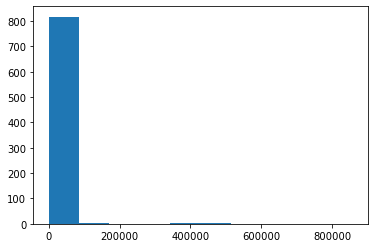

In [73]:
plt.hist(station_daily_GRD_CNTRL_42_ST['DAILY_ENTRIES'])

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


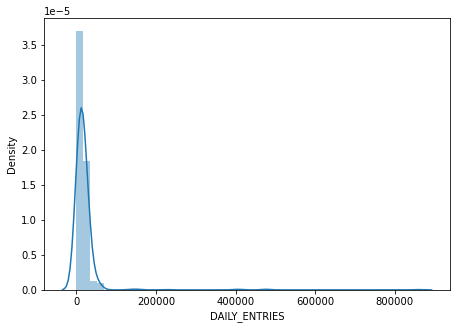

In [74]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(station_daily_GRD_CNTRL_42_ST['DAILY_ENTRIES'])
plt.show()

(array([820.,   0.,   0.,   2.,   0.,   0.,   1.,   0.,   1.,   2.]),
 array([4.000000e+00, 9.198130e+04, 1.839586e+05, 2.759359e+05,
        3.679132e+05, 4.598905e+05, 5.518678e+05, 6.438451e+05,
        7.358224e+05, 8.277997e+05, 9.197770e+05]),
 <BarContainer object of 10 artists>)

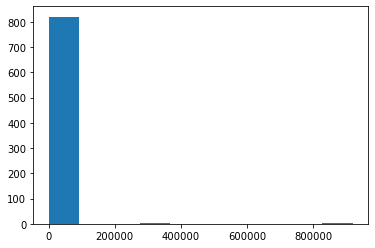

In [75]:
plt.hist(station_daily_GRD_CNTRL_42_ST['DAILY_EXITS'])

/Users/saeed/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


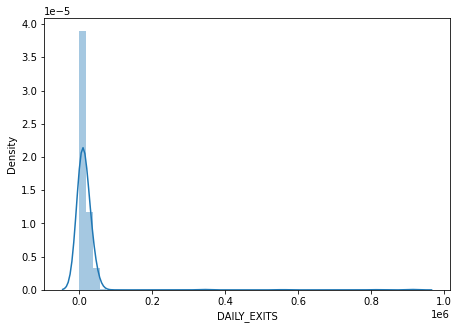

In [76]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(station_daily_GRD_CNTRL_42_ST['DAILY_EXITS'])
plt.show()

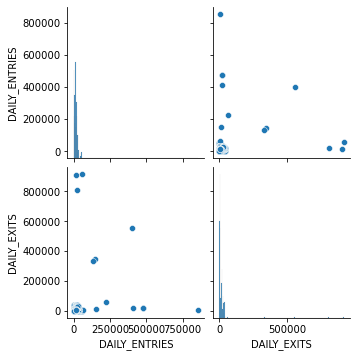

In [77]:
sns.pairplot(station_daily_GRD_CNTRL_42_ST);

In [78]:
avrg = new_daily_entries_exits1.groupby(by = ['STATION']).mean()
avrg

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES,EXITS,PREV_EXITS,DAILY_EXITS
STATION,,,,,,
1 AV,2.070720e+06,2.069591e+06,1129.861017,1.564314e+06,1.563022e+06,1292.172881
103 ST,7.930245e+06,7.953360e+06,1612.758690,5.415147e+06,5.752174e+06,1164.844251
103 ST-CORONA,7.115158e+06,7.113167e+06,1990.773305,5.995994e+06,5.994655e+06,1339.255297
104 ST,3.417439e+06,3.416995e+06,443.666667,3.485172e+06,3.484981e+06,190.224576
110 ST,6.412850e+06,6.411379e+06,1471.014124,6.130164e+06,6.128794e+06,1369.775424
...,...,...,...,...,...,...
WOODLAWN,6.180250e+06,6.179036e+06,1214.811864,2.399229e+06,2.398931e+06,298.496610
WORLD TRADE CTR,1.088882e+06,1.088465e+06,1419.466024,7.506422e+05,7.502164e+05,1092.319473
WTC-CORTLANDT,1.185712e+05,1.182412e+05,329.998006,8.455111e+04,8.427003e+04,281.087986


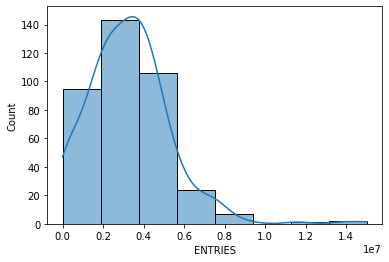

In [79]:
sns.histplot(avrg['ENTRIES'],bins=8, kde=True);

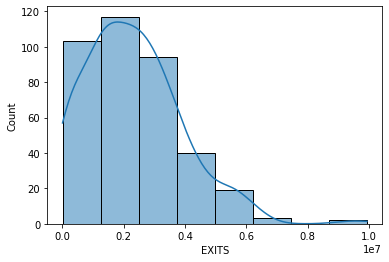

In [80]:
sns.histplot(avrg['EXITS'],bins=8, kde=True);

In [81]:
station_daily_GRD_CNTRL_42_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST['DATE']).dt.dayofweek
station_daily_GRD_CNTRL_42_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST['DATE']).dt.week
station_daily_GRD_CNTRL_42_ST.head()

<ipython-input-81-c2157a154961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_GRD_CNTRL_42_ST['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST['DATE']).dt.dayofweek
<ipython-input-81-c2157a154961>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_GRD_CNTRL_42_ST['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_GRD_CNTRL_42_ST['DATE']).dt.week
<ipython-input-81-c2157a154961>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,C/A,UNIT,STATION,DATE,DAILY_ENTRIES,DAILY_EXITS,DAY_OF_WEEK_NUM,WEEK_OF_YEAR
66866,R236,R045,GRD CNTRL-42 ST,2019-06-02,4319.0,6136.0,6,22
66867,R236,R045,GRD CNTRL-42 ST,2019-06-03,22810.0,21459.0,0,23
66868,R236,R045,GRD CNTRL-42 ST,2019-06-04,23517.0,21558.0,1,23
66869,R236,R045,GRD CNTRL-42 ST,2019-06-05,24730.0,22556.0,2,23
66870,R236,R045,GRD CNTRL-42 ST,2019-06-06,24457.0,22669.0,3,23
